In [1]:
%cd ..

/Users/marc/dev/playground/2021/nomadmap


In [2]:
from pathlib import Path
from PIL import Image as PILImage
from exif import Image


# Resize Images

In [3]:
# def resize_image(img_path: Path, basewidth: int=250, target_path: str='img_resized'):
#     fn = img_path.parts[-1]
#     target_path = img_path.parent.parent/target_path/fn
#     with PILImage.open(img_path) as img:
#         wpercent = (basewidth/float(img.size[0]))
#         hsize = int((float(img.size[1])*float(wpercent)))
#         img = img.resize((basewidth,hsize), PILImage.ANTIALIAS)
#         img.save(target_path)
# #     return img

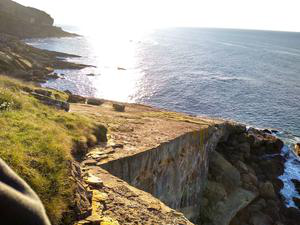

In [30]:
img = PILImage.open(Path('static/img_resized/IMG_20211014_183303324_HDR.jpg'))
img

In [4]:
raw_paths = list(Path('static/img_raw').glob('*.jpg'))

In [5]:
for fp in raw_paths:
    resize_image(fp, 300)

# Extract Meta

In [ ]:
import exif
img  = exif.Image(uploaded_file)
img.datetime

In [ ]:
def extract_meta(img):

In [6]:
def decimal_coords(coords, ref):
    decimal_degrees = coords[0] + coords[1] / 60 + coords[2] / 3600
    if ref == "S" or ref == "W":
        decimal_degrees = -decimal_degrees
    return decimal_degrees

def image_coordinates(image_path):
    coords = None
    with open(image_path, 'rb') as src:
        img = Image(src)  
    if img.has_exif:
        try:
            coords = (decimal_coords(img.gps_latitude, img.gps_latitude_ref),
                      decimal_coords(img.gps_longitude, img.gps_longitude_ref))
            dt = img.datetime_original
        except AttributeError:
            print('No Coordinates')
    else:
        print('The Image has no EXIF information')
    return coords

def image_datetime(image_path):
    dt = None
    with open(image_path, 'rb') as src:
        img = Image(src)  
    if img.has_exif:
        try:
            dt = img.datetime_original
        except AttributeError:
            print('No Datetime')
    else:
        print('The Image has no EXIF information')
    return dt

In [41]:
!ls static

IMG_0491.jpg         img_raw
IMG_0491_200_200.jpg img_resized


In [42]:
resized_paths = list(Path('static/img_raw').glob('*.jpg'))
resized_paths

[PosixPath('static/img_raw/IMG_20211014_183303324_HDR.jpg'),
 PosixPath('static/img_raw/IMG_20211013_102055583_HDR.jpg'),
 PosixPath('static/img_raw/IMG_20211012_172124684.jpg'),
 PosixPath('static/img_raw/IMG_20211010_073341857.jpg'),
 PosixPath('static/img_raw/IMG_20210808_180600573_HDR.jpg'),
 PosixPath('static/img_raw/IMG_20211012_153240955_HDR.jpg'),
 PosixPath('static/img_raw/IMG_20211004_172556086_HDR.jpg'),
 PosixPath('static/img_raw/IMG_20211010_183748956_HDR.jpg'),
 PosixPath('static/img_raw/IMG_20211009_115723871_HDR.jpg'),
 PosixPath('static/img_raw/IMG_20211010_073954163.jpg'),
 PosixPath('static/img_raw/IMG_20211014_194653944.jpg')]

In [43]:
Path('static/IMG_0491.jpg/')
image_coordinates(Path('static/IMG_0491.jpg/'))

(52.51846388888889, 13.396338888888888)

In [44]:
fn_to_coords = {
    'IMG_20210808_180600573_HDR.jpg': (52.50884144964325, 13.315151544679624),
    'IMG_20211004_172556086_HDR.jpg': (51.38657248001801, 9.453412013471558),
    'IMG_20211009_115723871_HDR.jpg': (47.340200458524414, 10.202968583188209),
    'IMG_20211010_073341857.jpg': (46.53272076953131, 10.4564773259075),
    'IMG_20211010_073954163.jpg': (46.53272076953131 + 0.1, 10.4564773259075 + 0.1),
    'IMG_20211010_183748956_HDR.jpg': (44.926597, 6.693246),
    'IMG_20211012_153240955_HDR.jpg': (45.06943700016987, 3.8560897329403305),
    'IMG_20211012_172124684.jpg.jpg': (45.310947, 3.387333),
    # 'IMG_20211013_102055583_HDR.jpg'SanSebatian,
    # 'IMG_20211013_102055583_HDR.jpg': SanSebatian ,
    # 'IMG_20211014_194653944.jpg' SanSebastian
}

In [61]:
image_metas = []
for fp in raw_paths:
    image_meta = {}
    fn = fp.parts[-1]
#     image_meta['coords'] = image_coordinates(fp)
    if fn in fn_to_coords:
        image_meta['name'] = fn
        image_meta['file_path'] = fp
        image_meta['date_time'] = image_datetime(fp)
        image_meta['coords'] = fn_to_coords[fn]
        image_metas.append(image_meta)
image_metas

[{'name': 'IMG_20211010_073341857.jpg',
  'file_path': PosixPath('static/img_raw/IMG_20211010_073341857.jpg'),
  'date_time': '2021:10:10 07:33:42',
  'coords': (46.53272076953131, 10.4564773259075)},
 {'name': 'IMG_20210808_180600573_HDR.jpg',
  'file_path': PosixPath('static/img_raw/IMG_20210808_180600573_HDR.jpg'),
  'date_time': '2021:08:08 18:06:01',
  'coords': (52.50884144964325, 13.315151544679624)},
 {'name': 'IMG_20211012_153240955_HDR.jpg',
  'file_path': PosixPath('static/img_raw/IMG_20211012_153240955_HDR.jpg'),
  'date_time': '2021:10:12 15:32:42',
  'coords': (45.06943700016987, 3.8560897329403305)},
 {'name': 'IMG_20211004_172556086_HDR.jpg',
  'file_path': PosixPath('static/img_raw/IMG_20211004_172556086_HDR.jpg'),
  'date_time': '2021:10:04 17:25:57',
  'coords': (51.38657248001801, 9.453412013471558)},
 {'name': 'IMG_20211010_183748956_HDR.jpg',
  'file_path': PosixPath('static/img_raw/IMG_20211010_183748956_HDR.jpg'),
  'date_time': '2021:10:10 18:37:50',
  'coords'

## Folium

In [46]:
# https://medium.com/image-vision/folium-all-you-need-for-map-visualization-206e88c8ac

In [99]:
import base64
from folium import plugins, Map
from folium.plugins import AntPath



In [76]:
from PIL import Image as PILImage
import io

def resize_image(img: PILImage, basewidth: int=250, target_path: str='img_resized'):
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), PILImage.ANTIALIAS)        
    return img


def image_to_byte_array(image:Image, _format):
    imgByteArr = io.BytesIO()
    image.save(imgByteArr, format=_format)
    imgByteArr = imgByteArr.getvalue()
    return imgByteArr

In [91]:
def create_marker(image_meta: dict, target_width=250) -> folium.Marker:    
    with PILImage.open(image_meta['file_path']) as img:
        _format = img.format
        img = resize_image(img, target_width)
        img_byte_arr = image_to_byte_array(img, _format)
        encoded = base64.b64encode(img_byte_arr)
    
    html = '<img src="data:image/JPG;base64,{}">'.format
    iframe = folium.IFrame(html(encoded.decode("UTF-8")), width=target_width +20, height=target_width +20)
    popup = folium.Popup(iframe, max_width=2000, show=False)
    
    icon = folium.Icon(color="blue", icon="truck", prefix='fa')
    marker = folium.Marker(location=image_meta['coords'], popup=popup, icon=icon)
    return marker

In [87]:
# def create_marker(img_fp: Path, data: dict) -> folium.Marker:
#     fn = img_fp.parts[-1]
    
#     with PILImage.open(img_fp) as img:
#         img_byte_arr = image_to_byte_array(img)
#         encoded = base64.b64encode(img_byte_arr)
# #     encoded = base64.b64encode(open(img_fp, 'rb').read())
    
#     html = '<img src="data:image/JPG;base64,{}">'.format
#     iframe = folium.IFrame(html(encoded.decode("UTF-8")), width=310, height=300)
#     popup = folium.Popup(iframe, max_width=2000, show=False)
    
#     icon = folium.Icon(color="blue", icon="truck", prefix='fa')
#     marker = folium.Marker(location=data[fn]['coords'], popup=popup, icon=icon)
#     return marker

In [88]:
sorted_image_metas = sorted(image_metas, key=lambda x: x['date_time'])
sorted_image_metas[0]['file_path']

PosixPath('static/img_raw/IMG_20210808_180600573_HDR.jpg')

In [94]:
marker.location

[45.06943700016987, 3.8560897329403305]

In [89]:
sorted_image_metas = sorted(image_metas, key=lambda x: x['date_time'])
markers = [create_marker(image_meta) for image_meta in sorted_image_metas]


In [106]:
def build_map(markers):
    route_lats_longs = [marker.location for marker in markers]
    
    lats = [coord[0] for coord in route_lats_longs]
    longs = [coord[1] for coord in route_lats_longs]
#     lat_center = sum([coord[0] for coord in route_lats_longs])/len(route_lats_longs)
#     long_center = sum([coord[1] for coord in route_lats_longs])/len(route_lats_longs)
    lat_center = (max(lats) + min(lats))/2
    long_center = (max(longs) + min(longs))/2
    
    folium.m = Map(location=(lat_center, long_center),
               zoom_start=6, width=1000, height=1000, control_scale=True,
               tiles='Stamen Watercolor')
    for marker in markers:
        m.add_child(marker)

    folium.plugins.AntPath(route_lats_longs, paused=True).add_to(m)
    return m

In [111]:
m = build_map(markers)
m

(1000.0, 1000.0)

In [101]:
m = folium.Map(location=(46.351494, 4.775687),
               zoom_start=6, width=1000, height=1000, control_scale=True,
               tiles='Stamen Watercolor')
for marker in markers:
    m.add_child(marker)

plugins.AntPath(route_lats_longs, paused=True).add_to(m)

m

In [18]:
!ls

README.md notebooks static


In [25]:
m.save("map.html")

In [24]:
with open('map.pkl', 'wb') as f:
    pickle.dump(m, f)

PicklingError: Can't pickle <function sync_do_first at 0x7fcc357344c0>: it's not the same object as jinja2.filters.sync_do_first

In [23]:
pickle.dumps(m, 'map.pkl')

TypeError: an integer is required (got type str)